<a href="https://colab.research.google.com/github/Anne340/Football_Scores_Prediction/blob/main/Football_Scores_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Defining the question

## Specifying the question

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches (as  shown below) given the datasets that will be provided

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

## Defining the Metric for success
I will use both polynomial and logistic approach to predict the goals of the home and away team scores

## Experimental design
The following was done to achieve success of the design 
Loading the dataset

Cleaning the datasets

Merging datasets

Performing EDA

Feature Engineering

Polynomial Regression

Assess their heteroscedasticity using Barlette's test


Computing the RMSE

Plotting residual plots

Logistic regression



## Data Relevance
The datasets we are using are in the link below:

 https://drive.google.com/open?id=1BYUqaEEnFtAe5lvzJh9lpVpR2MAvERUc

This will be able to answer the question if the data is relevant and sufficient

# Loading the dataset

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset
rank = pd.read_csv('fifa_ranking.csv')
rank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [ ]:
results = pd.read_csv('results.csv')
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


# Rank dataset

## Checking the data


In [ ]:
# Checking the shape of the dataset
rank.shape

(57793, 16)

In [ ]:
# Getting the statistical description of the dataset
rank.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [ ]:
# Get the unique values in the dataset
rank.nunique()

rank                         209
country_full                 216
country_abrv                 216
total_points               11114
previous_points             1557
rank_change                  121
cur_year_avg                7419
cur_year_avg_weighted       7419
last_year_avg               7473
last_year_avg_weighted      7001
two_year_ago_avg            7575
two_year_ago_weighted       6513
three_year_ago_avg          7628
three_year_ago_weighted     5849
confederation                  6
rank_date                    286
dtype: int64

In [ ]:
# Checking dataset information
rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

## Cleaning the Dataset

In [ ]:
# Checking for null values
rank.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [ ]:
# Checking for duplicates
rank.duplicated().sum()

37

In [ ]:
# Renaming column names
rank.rename(columns={'country_full': 'country',"rank_date":"date"}, inplace=True)

In [ ]:
#converting date column to date time datatype
rank['date']= pd.to_datetime(rank['date'])
rank['year'] = rank.date.dt.year
rank['month'] =rank.date.dt.month

In [ ]:
rank.drop(['date', 'total_points',	'previous_points', 'rank_change', 'cur_year_avg',	'cur_year_avg_weighted',
           'last_year_avg',	'last_year_avg_weighted',	'two_year_ago_avg',	'two_year_ago_weighted',	
           'three_year_ago_avg',	'three_year_ago_weighted', 'country_abrv', 'confederation'], axis=1, inplace=True)

In [ ]:
# Drop the duplicated values
rank.drop_duplicates(inplace=True)
rank.duplicated().sum()

0

In [ ]:
rank.head()

,rank,country,year,month
0,1,Germany,1993,8
1,2,Italy,1993,8
2,3,Switzerland,1993,8
3,4,Sweden,1993,8
4,5,Argentina,1993,8


In [ ]:
# Checking for outliers
Q1 = rank.quantile(0.25)
Q3 = rank.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

rank     101.0
year      12.0
month      6.0
dtype: float64


In [ ]:
# Dropping the outliers to see hpw much data we lose
rank_out = rank[~((rank < (Q1 - 1.5 * IQR)) |(rank > (Q3 + 1.5 * IQR))).any(axis=1)]
rank_out.shape

(57728, 4)

I decided not to drop the ouliers since they are such a big value compared to the lareger dataset 36521 out of 57793

# Results dataset

## Check the dataset

In [ ]:
# Checking the shape of the dataset
results.shape

(40839, 9)

In [ ]:
# Getting the statistical description of the dataset
results.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [ ]:
# Get the unique values in the dataset
results.nunique()

date          15115
home_team       309
away_team       306
home_score       26
away_score       22
tournament      109
city           1960
country         266
neutral           2
dtype: int64

In [ ]:
# Checking dataset information
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


## Cleaning the dataset

In [ ]:
# Checking the null values
results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [ ]:
# Checking for duplicates
results.duplicated().sum()

0

In [ ]:
# dropping unnecessary columns
results.drop(['city'], axis=1, inplace=True)
results.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland,False


In [ ]:
#converting date column to date time datatype
results['date']= pd.to_datetime(results['date'])
results['year'] = results.date.dt.year
results['month'] =results.date.dt.month

In [ ]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,year,month
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False,1872,11
1,1873-03-08,England,Scotland,4,2,Friendly,England,False,1873,3
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland,False,1874,3
3,1875-03-06,England,Scotland,2,2,Friendly,England,False,1875,3
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland,False,1876,3


In [ ]:
results.drop(['date'], axis=1, inplace=True)

# Merging the datasets


## Getting the home rank

In [ ]:
rank.head()

,rank,country,year,month
0,1,Germany,1993,8
1,2,Italy,1993,8
2,3,Switzerland,1993,8
3,4,Sweden,1993,8
4,5,Argentina,1993,8


In [ ]:
rank.columns
rank.rename(columns={'country':'home_team'}, inplace=True)

# renaming us rename the rank column
rank.rename(columns = {'rank': 'home_rank'}, inplace =True)

In [ ]:
# Joining our dataframes on the three columns they have in common
home = pd.merge(rank, results, how='right', on=['home_team','year','month'])
home.head()

,home_rank,home_team,year,month,away_team,home_score,away_score,tournament,country,neutral
0,NaN,Scotland,1872,11,England,0,0,Friendly,Scotland,False
1,NaN,England,1873,3,Scotland,4,2,Friendly,England,False
2,NaN,Scotland,1874,3,England,2,1,Friendly,Scotland,False
3,NaN,England,1875,3,Scotland,2,2,Friendly,England,False
4,NaN,Scotland,1876,3,England,3,0,Friendly,Scotland,False


In [ ]:
home.shape

(40889, 10)

In [ ]:
# Checking for null values
home.isnull().sum()

home_rank     22299
home_team         0
year              0
month             0
away_team         0
home_score        0
away_score        0
tournament        0
country           0
neutral           0
dtype: int64

In [ ]:
# Drop null values
home.dropna(inplace=True)
home.isnull().sum()

home_rank     0
home_team     0
year          0
month         0
away_team     0
home_score    0
away_score    0
tournament    0
country       0
neutral       0
dtype: int64

## Merging to get the away rank

In [ ]:
rank.head()

,home_rank,home_team,year,month
0,1,Germany,1993,8
1,2,Italy,1993,8
2,3,Switzerland,1993,8
3,4,Sweden,1993,8
4,5,Argentina,1993,8


In [ ]:
rank.columns
rank.rename(columns={'home_team':'away_team'}, inplace=True)


In [ ]:
# Let us now join our dataframes on the three columns they have in common
away = pd.merge(rank, results, how='right', on=['away_team','year','month'])
away.head()

,home_rank,away_team,year,month,home_team,home_score,away_score,tournament,country,neutral
0,NaN,England,1872,11,Scotland,0,0,Friendly,Scotland,False
1,NaN,Scotland,1873,3,England,4,2,Friendly,England,False
2,NaN,England,1874,3,Scotland,2,1,Friendly,Scotland,False
3,NaN,Scotland,1875,3,England,2,2,Friendly,England,False
4,NaN,England,1876,3,Scotland,3,0,Friendly,Scotland,False


In [ ]:
# Checking for null values
away.isnull().sum()

home_rank     22389
away_team         0
year              0
month             0
home_team         0
home_score        0
away_score        0
tournament        0
country           0
neutral           0
dtype: int64

In [ ]:
# Drop null values
away.dropna(inplace=True)
away.isnull().sum()

home_rank     0
away_team     0
year          0
month         0
home_team     0
home_score    0
away_score    0
tournament    0
country       0
neutral       0
dtype: int64

In [ ]:
# Merging the two datasets to get a final one
final = pd.merge(home, away, how = 'inner', left_on = ['year', 'month','away_team'],
              right_on = ['year', 'month','away_team'])
final.head()

,home_rank_x,home_team_x,year,month,away_team,home_score_x,away_score_x,tournament_x,country_x,neutral_x,home_rank_y,home_team_y,home_score_y,away_score_y,tournament_y,country_y,neutral_y
0,19.0,Colombia,1993,8,Paraguay,0,0,FIFA World Cup qualification,Colombia,False,67.0,Colombia,0,0,FIFA World Cup qualification,Colombia,False
1,19.0,Colombia,1993,8,Paraguay,0,0,FIFA World Cup qualification,Colombia,False,67.0,Argentina,0,0,FIFA World Cup qualification,Argentina,False
2,5.0,Argentina,1993,8,Paraguay,0,0,FIFA World Cup qualification,Argentina,False,67.0,Colombia,0,0,FIFA World Cup qualification,Colombia,False
3,5.0,Argentina,1993,8,Paraguay,0,0,FIFA World Cup qualification,Argentina,False,67.0,Argentina,0,0,FIFA World Cup qualification,Argentina,False
4,70.0,Peru,1993,8,Argentina,0,1,FIFA World Cup qualification,Peru,False,5.0,Peru,0,1,FIFA World Cup qualification,Peru,False


In [ ]:
# Checking for null values
final.isnull().sum()

home_rank_x     0
home_team_x     0
year            0
month           0
away_team       0
home_score_x    0
away_score_x    0
tournament_x    0
country_x       0
neutral_x       0
home_rank_y     0
home_team_y     0
home_score_y    0
away_score_y    0
tournament_y    0
country_y       0
neutral_y       0
dtype: int64

In [ ]:
final.shape

(28421, 17)

In [ ]:
# Dropping some of the columns
final.drop(columns=['country_x', 'country_y', 'country_x',	'neutral_x',	'home_rank_y',	
                    'home_team_y',	'home_score_y',	'away_score_y',	'tournament_y', 'neutral_y'], inplace=True)

In [ ]:
# Renaming the columns
final.rename(columns={'home_rank_x' : 'home_rank',	
                      'home_team_x': 'home_team',
                      'home_score_x': 'home_score',
                      'away_score_x': 'away_score',
                      'tournament_x': 'tournament'},
                      inplace = True    
                  )

In [ ]:
final.head()

,home_rank,home_team,year,month,away_team,home_score,away_score,tournament
0,19.0,Colombia,1993,8,Paraguay,0,0,FIFA World Cup qualification
1,19.0,Colombia,1993,8,Paraguay,0,0,FIFA World Cup qualification
2,5.0,Argentina,1993,8,Paraguay,0,0,FIFA World Cup qualification
3,5.0,Argentina,1993,8,Paraguay,0,0,FIFA World Cup qualification
4,70.0,Peru,1993,8,Argentina,0,1,FIFA World Cup qualification


In [ ]:
# Creating a new column with win, lose draw status

shape = [(final['home_score']== final['away_score']),
          (final['home_score']> final['away_score']),
          (final['home_score'] < final['away_score'])]
           
# Assigning status to the above code
status = ['Draw', 'Win', 'Lose']

final['status'] = np.select(shape, status)
final.head()

,home_rank,home_team,year,month,away_team,home_score,away_score,tournament,status
0,19.0,Colombia,1993,8,Paraguay,0,0,FIFA World Cup qualification,Draw
1,19.0,Colombia,1993,8,Paraguay,0,0,FIFA World Cup qualification,Draw
2,5.0,Argentina,1993,8,Paraguay,0,0,FIFA World Cup qualification,Draw
3,5.0,Argentina,1993,8,Paraguay,0,0,FIFA World Cup qualification,Draw
4,70.0,Peru,1993,8,Argentina,0,1,FIFA World Cup qualification,Lose


# Exploratory Data Analysis

## Univariate analysis

Text(0.5, 1.0, 'Tournaments Distribution')

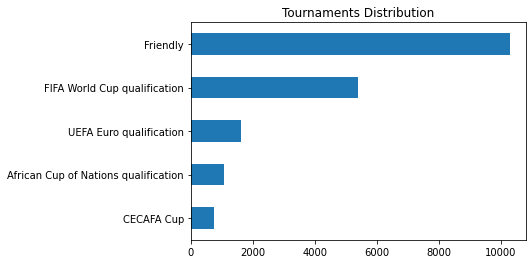

In [ ]:
# Graph showing tournaments
final.tournament.value_counts().head().sort_values().plot.barh()
plt.title('Tournaments Distribution')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9f3144f790>,
      dtype=object)

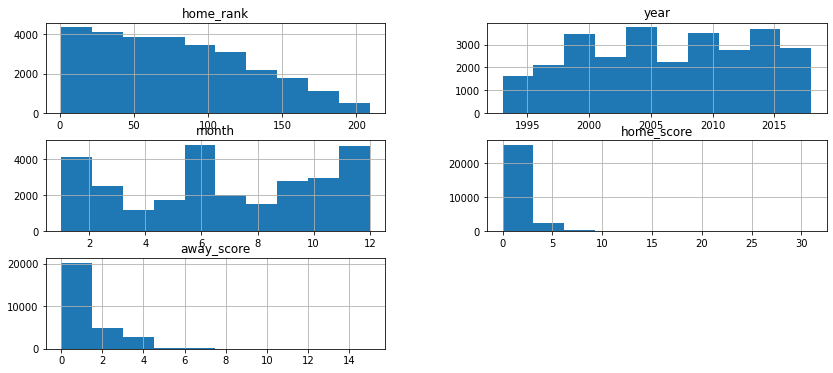

In [ ]:
# Checking the distribution of our data
final.hist(bins=10, figsize=[14,6])

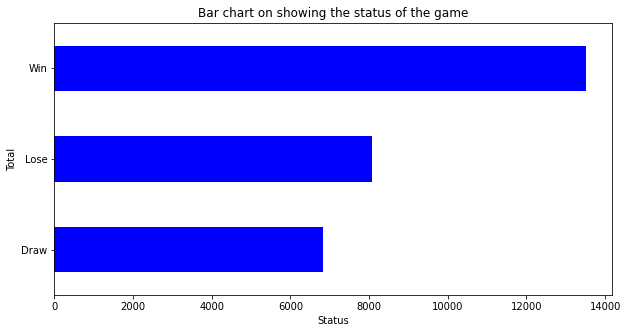

In [ ]:
# Bar chart on showing the status of the game
plt.figure(figsize = (10,5))
final.groupby('status').size().plot(kind='barh', color='blue')
plt.title('Bar chart on showing the status of the game')
plt.ylabel('Total')
plt.xlabel('Status')
plt.show()

## Bivariate Analysis

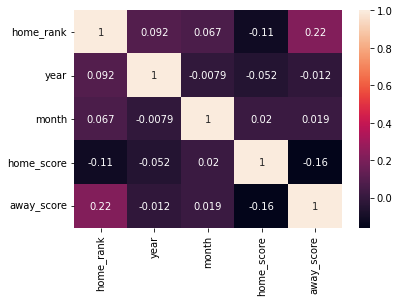

In [ ]:
# Checking for correlation
sns.heatmap(final.corr(method='pearson'), annot=True)


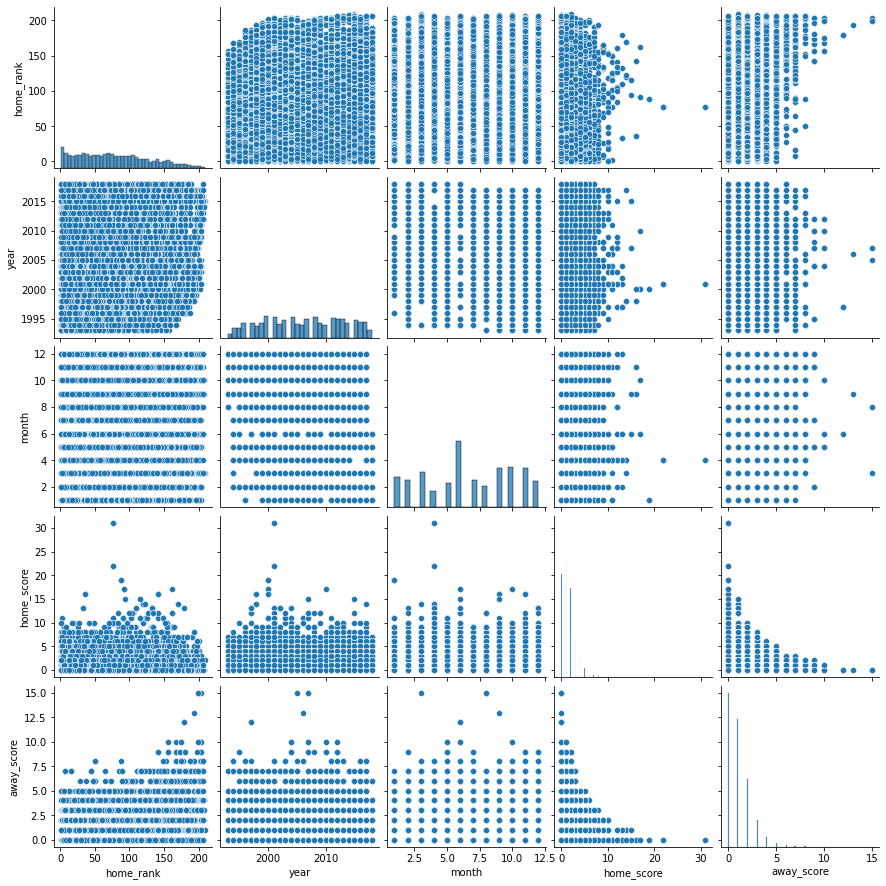

In [ ]:
# Plotting pairplots
sns.pairplot(final)
plt.show()

In [ ]:
final.head(1)

,home_rank,home_team,year,month,away_team,home_score,away_score,tournament,status
0,19.0,Colombia,1993,8,Paraguay,0,0,FIFA World Cup qualification,Draw


# Checking Multicollinearity

In [ ]:
# Focusing on our independent variables only.
independent_only = final[['home_rank', 'year', 'month', 'home_score',	'away_score']]

# display the correlations between the variables
correlations = independent_only.corr()

correlations

,home_rank,year,month,home_score,away_score
home_rank,1.000000,0.092111,0.067106,-0.114965,0.221412
year,0.092111,1.000000,-0.007880,-0.052126,-0.012378
month,0.067106,-0.007880,1.000000,0.020022,0.019435
home_score,-0.114965,-0.052126,0.020022,1.000000,-0.160994
away_score,0.221412,-0.012378,0.019435,-0.160994,1.000000


In [ ]:
# Getting VIF of dataframe
vif = pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)
vif

,home_rank,year,month,home_score,away_score
home_rank,1.072906,-0.097792,-0.070090,0.083598,-0.223944
year,-0.097792,1.012124,0.012768,0.047966,0.041654
month,-0.070090,0.012768,1.005548,-0.028897,-0.008518
home_score,0.083598,0.047966,-0.028897,1.036768,0.149559
away_score,-0.223944,0.041654,-0.008518,0.149559,1.074343


# Polynomial Regression

## Predicting home score

In [ ]:
#importing necessary libraries
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#defining X and y using the column locations
X = final.iloc[:, [0,1,2,3,4,6,7,8]]
y = final['home_score'].values

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# This is our prediction for admission based on our model
y_pred = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, confusion_matrix
# Let's describe our residual:
pd.DataFrame(residuals).describe()
print("The RMSE score for the model : ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("The residual mean score for the model : ", residuals.mean())

The RMSE score for the model :  1.1059568950285468
The residual mean score for the model :  0.008427790599357816


The model has a low RMSE hence it is ok to help us make predictions

## Heterodkedasticity

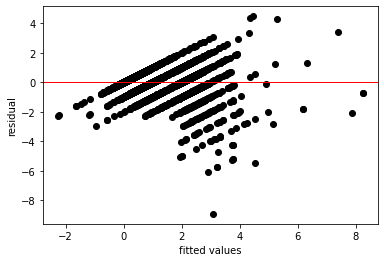

In [ ]:
residuals = y_pred - y_test
import matplotlib.pyplot as plt

plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

## Predicting away score

In [ ]:
final.head(1)

,home_rank,home_team,year,month,away_team,home_score,away_score,tournament,status
0,19.0,Colombia,1993,8,Paraguay,0,0,FIFA World Cup qualification,Draw


In [ ]:
#importing necessary libraries
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#defining X and y using the column locations
X = final.iloc[:, [0,1,2,3,4,5,7,8]]
y = final['away_score'].values

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# This is our prediction for admission based on our model
y_pred = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, confusion_matrix
# Let's describe our residual:
pd.DataFrame(residuals).describe()
print("The RMSE score for the model : ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("The residual mean score for the model : ", residuals.mean())

The RMSE score for the model :  0.8540769879044996
The residual mean score for the model :  0.005898857074233369


The model has a low RMSE hence it is ok to help us make predictions

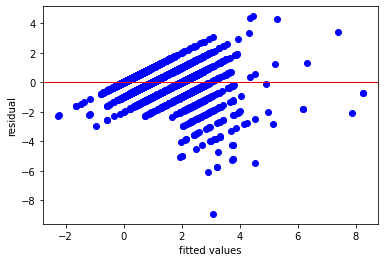

In [ ]:
residuals = y_pred - y_test

import matplotlib.pyplot as plt

plt.scatter(y_pred, residuals, color='blue')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

# Logistic Regression

In [ ]:
#splitting our dataset
X = final[["home_rank","home_score", "away_score"]].values
y = final["status"].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression

#Model Selection:
LogReg = LogisticRegression()

#Fitting the model:
LogReg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

In [ ]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[1329,    0,    0],
       [   0, 1645,    0],
       [   0,    0, 2711]])

From the prediction matrix we can see that the data is predicted accurately

## Conclusion

The polynomial regression and logistic regression yield somewhat accurete models to predict the outcomes hence can be considered as modelling techniques